In [1]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt

from nonlinear_walk import NonlinearRandomWalk

In [2]:
facebook = pd.read_csv(
    "data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook



,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [3]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")
G

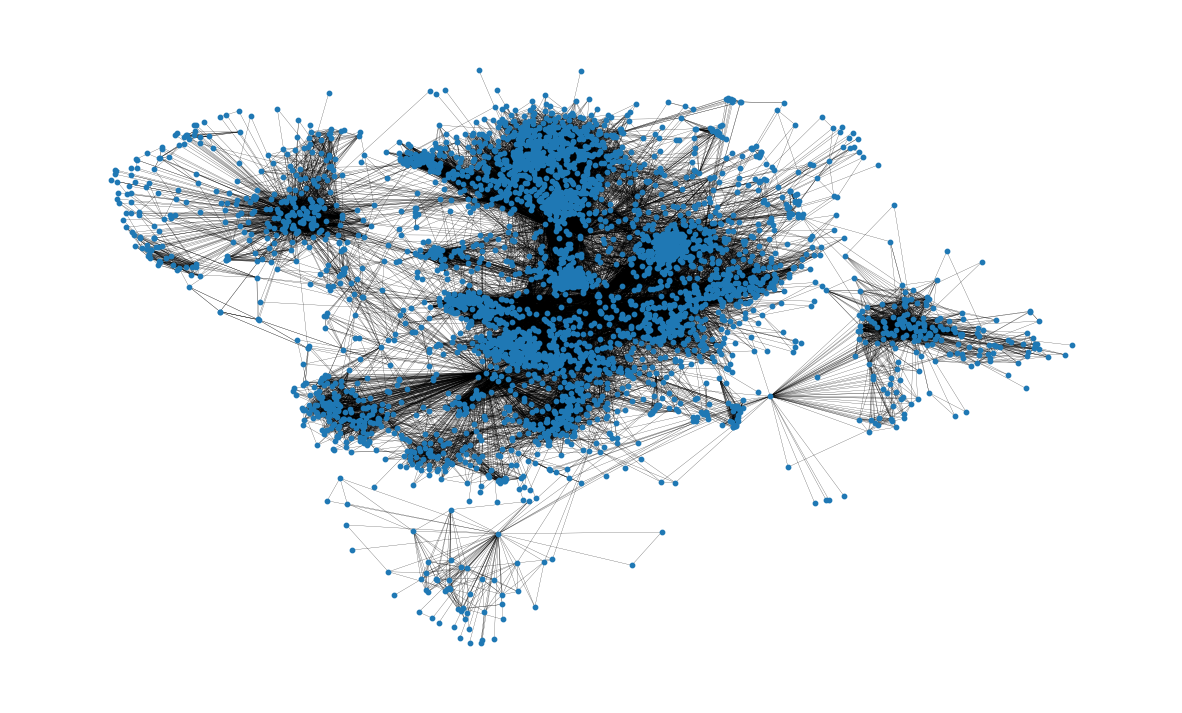

In [4]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [5]:
graph_walk = NonlinearRandomWalk(G)

C:\Users\piotr\Workspace\graph-random-walk\nonlinear_walk.py:93: UserWarning: frames=<generator object NonlinearRandomWalk.simulate at 0x0000021FCC57BCD0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


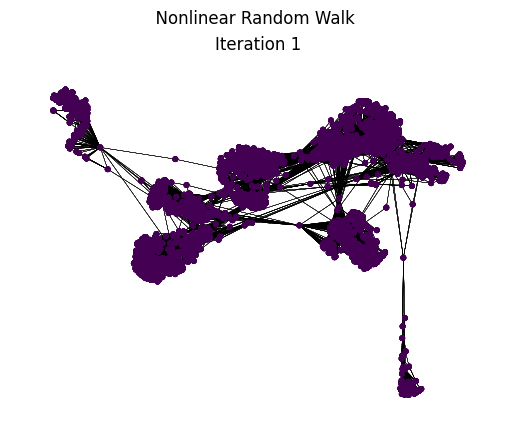

In [6]:
graph_walk.get_visualization(max_iter=2, filename="facebook_1iter.gif")


C:\Users\piotr\Workspace\graph-random-walk\nonlinear_walk.py:93: UserWarning: frames=<generator object NonlinearRandomWalk.simulate at 0x0000021FCC57BA70> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


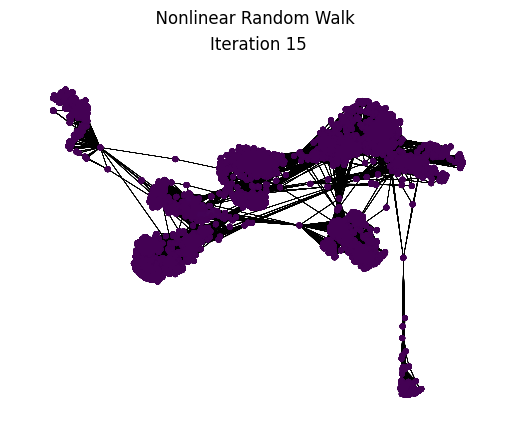

In [7]:
graph_walk.get_visualization(alpha=2, max_iter=50, filename='facebook_50iter.gif')


In [8]:
graph_walk.calculate_for_alphas(-6, 6, 100, tol=1e-6, max_iter=200)

OSError: [Errno 22] Invalid argument: 'nonlinear_random_walk-2023-12-15T17:18:20.350301.png'

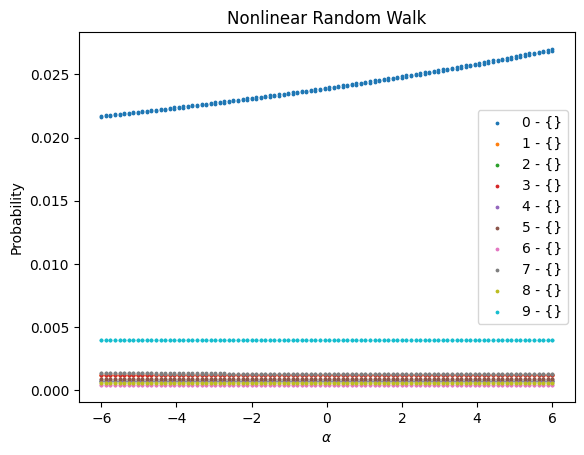

In [9]:
graph_walk.plot_for_alphas(range(0,10))

In [ ]:
graph_walk.plot_for_alphas(range(1255,1265))


In [ ]:
graph_walk.plot_for_alphas(range(2525,2535))
